In [1]:
import pandas as pd

In [2]:
unified_df = pd.read_parquet("../data/processed/unified_dataset.parquet")

In [3]:
unified_df.head()

,bvp,label,subject_id,dataset,device,skin_tone,noise_level,acc_x,acc_y,acc_z
2020-01-03 08:00:00+00:00,5.673109,0,2,physionet,apple_watch,V-VI,0.05088,-0.817685,-62.628226,4.996602
2020-01-03 08:00:00+00:00,7.687833,0,2,physionet,apple_watch,I-II,0.07712,-0.973498,-62.739436,5.184150
2020-01-03 08:00:00+00:00,1.509560,0,2,physionet,apple_watch,III-IV,0.06400,-1.054134,-62.992483,5.020381
2020-01-03 08:00:00+00:00,-0.000000,0,2,physionet,clean,none,0.00000,-63.000000,-1.000000,-5.000000
2020-01-03 08:00:00+00:00,12.999866,0,2,physionet,galaxy_watch,III-IV,0.09600,-1.000000,-69.300000,5.000000


In [4]:
# Get basic information about the dataset
print('Dataset Info:')
print(unified_df.info())

# Check for NaN values
print('\nNaN Values:')
print(unified_df.isna().sum())

# Get summary statistics
print('\nSummary Statistics:')
print(unified_df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6556893 entries, 2020-01-03 08:00:00+00:00 to 2025-02-21 01:38:51.840681+00:00
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bvp          float64
 1   label        int64  
 2   subject_id   int64  
 3   dataset      object 
 4   device       object 
 5   skin_tone    object 
 6   noise_level  float64
 7   acc_x        float64
 8   acc_y        float64
 9   acc_z        float64
dtypes: float64(5), int64(2), object(3)
memory usage: 550.3+ MB
None

NaN Values:
bvp            0
label          0
subject_id     0
dataset        0
device         0
skin_tone      0
noise_level    0
acc_x          0
acc_y          0
acc_z          0
dtype: int64

Summary Statistics:
                bvp         label    subject_id   noise_level         acc_x  \
count  6.556893e+06  6.556893e+06  6.556893e+06  6.556893e+06  6.556893e+06   
mean   3.681047e+00  1.139213e-01  6.293065e+00  6.857143e-02  1.

In [5]:
# Replace 0 values in 'bvp' column with NaN
unified_df['bvp'].replace(0, pd.NA, inplace=True)

# Drop rows with NaN values
unified_df.dropna(inplace=True)


# Advanced EDA and Visualization

## Distribution of the Data

### Distribution of BVP

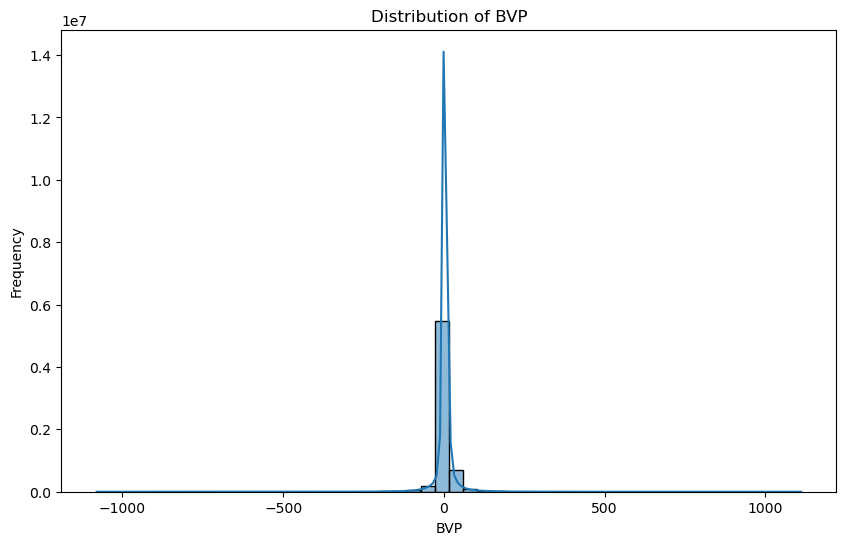

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns   
plt.figure(figsize=(10, 6))
sns.histplot(unified_df['bvp'], bins=50, kde=True)
plt.title('Distribution of BVP')
plt.xlabel('BVP')
plt.ylabel('Frequency')
plt.show()

### Distribution of Labels

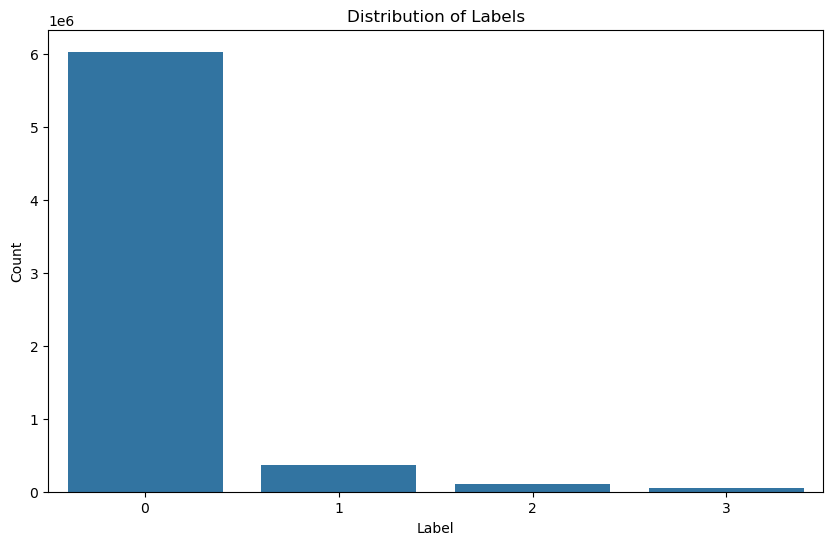

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=unified_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Distribution of Noise Levels

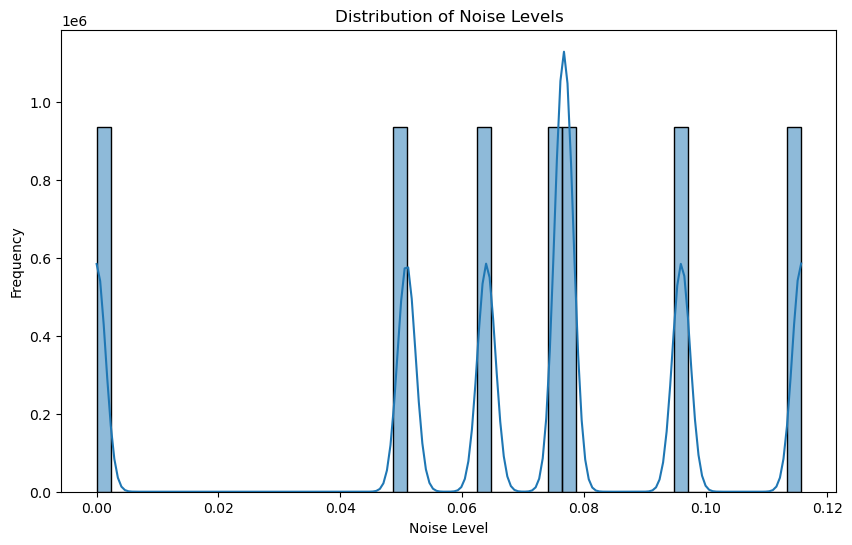

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(unified_df['noise_level'], bins=50, kde=True)
plt.title('Distribution of Noise Levels')
plt.xlabel('Noise Level')
plt.ylabel('Frequency')
plt.show()

### Distribution of Accelerometer Data (acc_x, acc_y, acc_z)

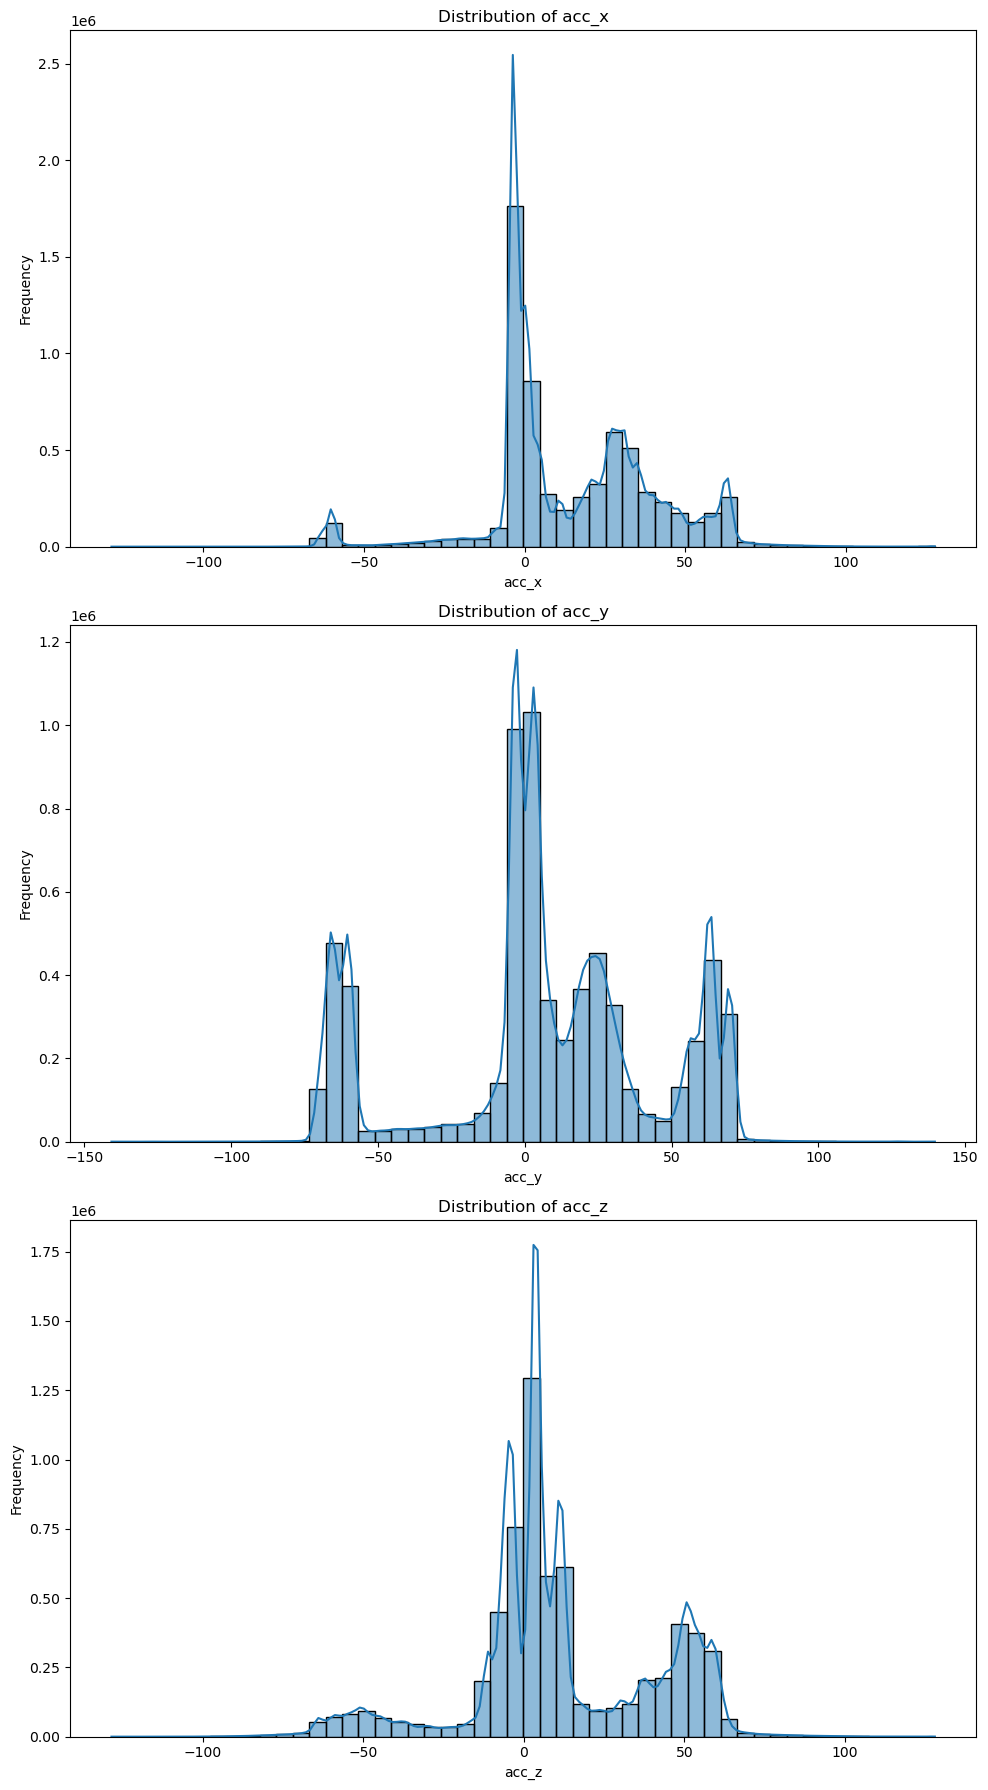

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))
sns.histplot(unified_df['acc_x'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of acc_x')
axes[0].set_xlabel('acc_x')
axes[0].set_ylabel('Frequency')

sns.histplot(unified_df['acc_y'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of acc_y')
axes[1].set_xlabel('acc_y')
axes[1].set_ylabel('Frequency')

sns.histplot(unified_df['acc_z'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribution of acc_z')
axes[2].set_xlabel('acc_z')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation Heatmap

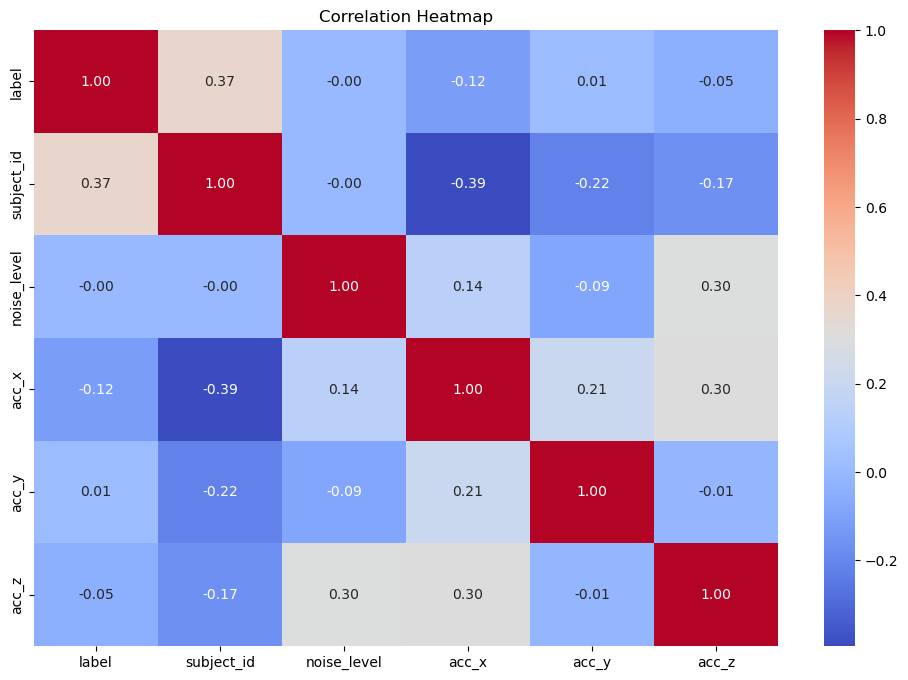

In [13]:
plt.figure(figsize=(12, 8))
# Select only numeric columns
numeric_df = unified_df.select_dtypes(include=[float, int])

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

## Device-Specific Analysis:

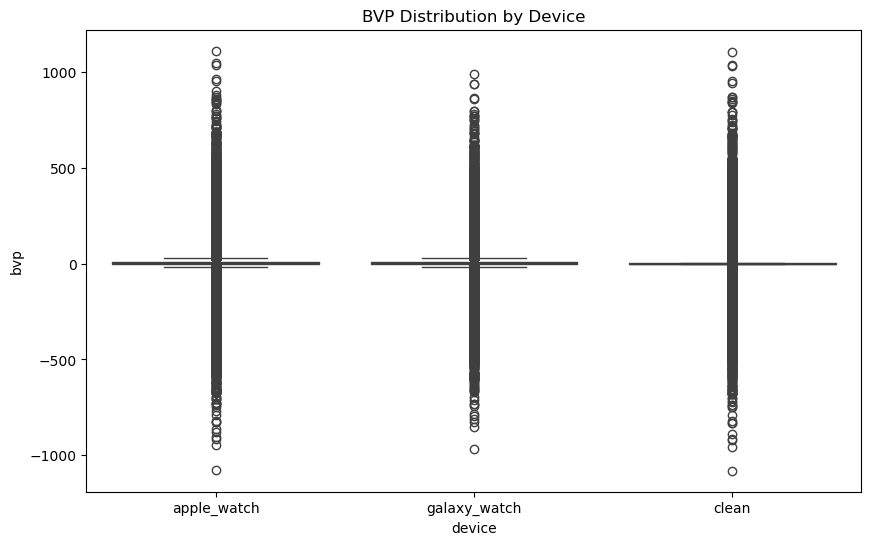

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='device', y='bvp', data=unified_df)
plt.title('BVP Distribution by Device')
plt.show()

In [15]:
unified_df.to_parquet("../data/processed/cleaned_unified_dataset.parquet")